**Mengimport & menampilkan file jokowi.csv yang hendak di Bersihkan**


In [ ]:
import pandas as pd

jokowi = pd.read_csv('jokowi.csv')
print(jokowi.head())

   conversation_id_str                      created_at  favorite_count  \
0  1901993788048019865  Tue Mar 18 13:47:11 +0000 2025           17854   
1  1902173440867758569  Wed Mar 19 01:41:03 +0000 2025             260   
2  1902612799110705568  Thu Mar 20 06:46:54 +0000 2025            6935   
3  1901601231484997790  Mon Mar 17 11:47:18 +0000 2025            3916   
4  1902166431787053194  Wed Mar 19 01:13:12 +0000 2025             178   

                                           full_text               id_str  \
0  Rakyat minta #AdiliJokowi malah teriak hidup j...  1901993788048019865   
1  PENGKHIANAT NEGARA PENJUAL INDONESIA !! BASMI ...  1902173440867758569   
2  Sisil Ex Member JKT48 Angel Ex Member JKT48 ht...  1902612799110705568   
3  Jika Banten Bergerak Nusantara Bergejolak... T...  1901601231484997790   
4  Tolak RUU TNI SDM TNI tidak untuk diskusi dan ...  1902166431787053194   

                                           image_url in_reply_to_screen_name  \
0  https://p

Kode tersebut digunakan untuk membaca file CSV bernama jokowi.csv dan menampilkannya. Pertama, pandas diimpor sebagai pd, lalu file CSV dibaca menggunakan pd.read_csv() dan disimpan ke dalam variabel jokowi. Terakhir, jokowi.head() digunakan untuk menampilkan 5 baris pertama dari data tersebut sebagai tampilan awal isi dataset.

**Menampilkan struktur kolom dari data tersebut**

In [ ]:
jokowi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      213 non-null    int64 
 1   created_at               213 non-null    object
 2   favorite_count           213 non-null    int64 
 3   full_text                213 non-null    object
 4   id_str                   213 non-null    int64 
 5   image_url                158 non-null    object
 6   in_reply_to_screen_name  12 non-null     object
 7   lang                     213 non-null    object
 8   location                 122 non-null    object
 9   quote_count              213 non-null    int64 
 10  reply_count              213 non-null    int64 
 11  retweet_count            213 non-null    int64 
 12  tweet_url                213 non-null    object
 13  user_id_str              213 non-null    int64 
 14  username                 213 non-null    o

----

# **Tahapan Cleaning Data**

**Menampilkan isi kolom full_text yang berisi cuitan2 masyarakat**

In [ ]:
jokowi["full_text"]

,full_text
0,Rakyat minta #AdiliJokowi malah teriak hidup j...
1,PENGKHIANAT NEGARA PENJUAL INDONESIA !! BASMI ...
2,Sisil Ex Member JKT48 Angel Ex Member JKT48 ht...
3,Jika Banten Bergerak Nusantara Bergejolak... T...
4,Tolak RUU TNI SDM TNI tidak untuk diskusi dan ...
...,...
208,Bocah umur 10 tahun gantung diri karena tidak ...
209,@Tan_Mar3M @jokowi Jadi presiden 2 periode kok...
210,Rakyat Bersuara Malam Ini: 'Cawe-Cawe Kasus Jo...
211,Tak Henti-hentinya Soal Ijazah S1 Jokowi: Ada ...


**Membuat Sebuah fungsi cleaning untuk membersihkan simbol-simbol yang tidak penting/tak digunakan**

In [ ]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

fungsi ini membantu menghasilkan teks yang lebih bersih dan rapi sehingga lebih siap untuk dianalisis atau diproses lebih lanjut dalam tahapan seperti tokenisasi, analisis sentimen, atau pemodelan teks.

**Menyimpan hasilnya dalam sebuah variabel yang baru**

In [ ]:
jokowi["text_clean"] = ''

Kode jokowi["text_clean"] = '' digunakan untuk menambahkan kolom baru bernama text_clean ke dalam DataFrame jokowi, dan mengisinya dengan nilai kosong (string kosong) untuk setiap baris.

In [ ]:
for i, row in jokowi.iterrows():
    jokowi.at[i, "text_clean"] = clean(row.full_text)

Kode berikut digunakan untuk mengisi kolom text_clean pada DataFrame jokowi dengan hasil dari fungsi clean() yang diterapkan pada setiap baris kolom full_text.

**Menampilkan 5 data teratas**

In [ ]:
jokowi.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1901993788048019865,Tue Mar 18 13:47:11 +0000 2025,17854,Rakyat minta #AdiliJokowi malah teriak hidup j...,1901993788048019865,https://pbs.twimg.com/ext_tw_video_thumb/19019...,NaN,in,NaN,93,138,4061,https://x.com/Boediantar4/status/1901993788048...,1383750727575605257,Boediantar4,Rakyat minta #AdiliJokowi malah teriak hidup j...
1,1902173440867758569,Wed Mar 19 01:41:03 +0000 2025,260,PENGKHIANAT NEGARA PENJUAL INDONESIA !! BASMI ...,1902173440867758569,https://pbs.twimg.com/media/GmXgqGVa8AEZAPj.jpg,NaN,in,"GAZA,PALESTINE🇵🇸",6,15,156,https://x.com/OjolNyambi/status/19021734408677...,1488415825958944771,OjolNyambi,PENGKHIANAT NEGARA PENJUAL INDONESIA !! BASMI ...
2,1902612799110705568,Thu Mar 20 06:46:54 +0000 2025,6935,Sisil Ex Member JKT48 Angel Ex Member JKT48 ht...,1902612799110705568,https://pbs.twimg.com/media/GmdwPv8asAAuLhb.jpg,NaN,in,Gita 🧎‍♀️,202,105,1263,https://x.com/purppleheather/status/1902612799...,1260810206738407426,purppleheather,Sisil Ex Member JKT48 Angel Ex Member JKT48
3,1901601231484997790,Mon Mar 17 11:47:18 +0000 2025,3916,Jika Banten Bergerak Nusantara Bergejolak... T...,1901601231484997790,https://pbs.twimg.com/ext_tw_video_thumb/19016...,NaN,in,NaN,24,92,1647,https://x.com/Bang_Ramzan/status/1901601231484...,1433433068283392007,Bang_Ramzan,Jika Banten Bergerak Nusantara Bergejolak... T...
4,1902166431787053194,Wed Mar 19 01:13:12 +0000 2025,178,Tolak RUU TNI SDM TNI tidak untuk diskusi dan ...,1902166431787053194,https://pbs.twimg.com/amplify_video_thumb/1902...,NaN,in,"Kota Madiun, Jawa Timur",3,15,87,https://x.com/ilhampid/status/1902166431787053194,1447198634726998016,ilhampid,Tolak RUU TNI SDM TNI tidak untuk diskusi dan ...


**Membandingkan data sebelum di clean dan setelah di clean**

Fungsi pd.set_option('display.max_colwidth', None) digunakan untuk menampilkan seluruh isi kolom teks tanpa dipotong saat DataFrame ditampilkan. Secara default, pandas memotong (truncate) teks yang terlalu panjang dan menggantinya dengan ... agar tampilan lebih ringkas.

In [ ]:
# Menampilkan seluruh isi kolom tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Kemudian panggil ulang data
jokowi[["full_text", "text_clean"]].head()


,full_text,text_clean
0,Rakyat minta #AdiliJokowi malah teriak hidup jokowi Rakyat minta aset koruptor disita malah mau sita kendaraan rakyat yg telat bayar pajak 10 tahun Mau tambah berapa lama lagi? Rakyat mau tambah penderitaan?? Jadi ingat PERUBAHAN ️ 🇮🇩 https://t.co/9GbQM6aFI7,Rakyat minta #AdiliJokowi malah teriak hidup jokowi Rakyat minta aset koruptor disita malah mau sita kendaraan rakyat yg telat bayar pajak 10 tahun Mau tambah berapa lama lagi? Rakyat mau tambah penderitaan?? Jadi ingat PERUBAHAN ️ 🇮🇩
1,PENGKHIANAT NEGARA PENJUAL INDONESIA !! BASMI SEGERA !! AYO REVOLUSI !! GANTUNG JOKOWI !!! #JokowiRajaCinaSerbaPalsu #TolakRUUTNI #KobarkanApiREVOLUSI #AdiliJokowiHargaMati https://t.co/dG05vWUgXX,PENGKHIANAT NEGARA PENJUAL INDONESIA !! BASMI SEGERA !! AYO REVOLUSI !! GANTUNG JOKOWI !!! #JokowiRajaCinaSerbaPalsu #TolakRUUTNI #KobarkanApiREVOLUSI #AdiliJokowiHargaMati
2,Sisil Ex Member JKT48 Angel Ex Member JKT48 https://t.co/Xf88kIx92Z,Sisil Ex Member JKT48 Angel Ex Member JKT48
3,Jika Banten Bergerak Nusantara Bergejolak... Tangkap Aguan Tangkap Jokowi https://t.co/sSCV0fEeVT,Jika Banten Bergerak Nusantara Bergejolak... Tangkap Aguan Tangkap Jokowi
4,Tolak RUU TNI SDM TNI tidak untuk diskusi dan berfikir tapi emosi arogansi dan senjata Sehingga tidak cocok Tentara masuk ruang sipil yg terjadi pelanggaran HAM #TolakRUUTNI #TolakRevisiUUTNI ala prabowo dan jokowi Ya allah selamattt kan indo Innalillahi kebijakan https://t.co/txzEn4TwuV,Tolak RUU TNI SDM TNI tidak untuk diskusi dan berfikir tapi emosi arogansi dan senjata Sehingga tidak cocok Tentara masuk ruang sipil yg terjadi pelanggaran HAM #TolakRUUTNI #TolakRevisiUUTNI ala prabowo dan jokowi Ya allah selamattt kan indo Innalillahi kebijakan


# **NLTK Process**

NLTK processing adalah serangkaian teknik dari pustaka NLTK (Natural Language Toolkit) untuk membersihkan dan menganalisis teks bahasa alami, seperti tokenisasi, stemming, dan penghapusan stop words. Proses ini membantu menyiapkan data teks agar lebih mudah dianalisis dalam tugas-tugas seperti klasifikasi atau analisis sentimen.

**Menginstal Natural Language Toolkit**

In [ ]:
pip install nltk

**mengunduh dataset**

In [ ]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Contoh proses tokenisasi dalam bahasa inggris

In [ ]:
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


**melakukan tokenisasi pada data yang telah di clean & membandingkan data sebelum di tokenisasi dan setelah di tokenisasi**

In [ ]:
# Tokenisasi kata pada kolom 'text_clean'
jokowi['tokenized_text'] = jokowi['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(jokowi[['text_clean', 'tokenized_text']].head())


                                                                                                                                                                                                                                                                  text_clean  \
0                                Rakyat minta #AdiliJokowi malah teriak hidup jokowi Rakyat minta aset koruptor disita malah mau sita kendaraan rakyat yg telat bayar pajak 10 tahun Mau tambah berapa lama lagi? Rakyat mau tambah penderitaan?? Jadi ingat PERUBAHAN ️ 🇮🇩    
1                                                                                              PENGKHIANAT NEGARA PENJUAL INDONESIA !! BASMI SEGERA !! AYO REVOLUSI !! GANTUNG JOKOWI !!! #JokowiRajaCinaSerbaPalsu #TolakRUUTNI #KobarkanApiREVOLUSI #AdiliJokowiHargaMati    
2                                                                                                                                                                                       

Menampilkan 5 data teratas setelah tokenisasi

In [ ]:
jokowi["tokenized_text"].head()

,tokenized_text
0,"[Rakyat, minta, #, AdiliJokowi, malah, teriak, hidup, jokowi, Rakyat, minta, aset, koruptor, disita, malah, mau, sita, kendaraan, rakyat, yg, telat, bayar, pajak, 10, tahun, Mau, tambah, berapa, lama, lagi, ?, Rakyat, mau, tambah, penderitaan, ?, ?, Jadi, ingat, PERUBAHAN, ️, 🇮🇩]"
1,"[PENGKHIANAT, NEGARA, PENJUAL, INDONESIA, !, !, BASMI, SEGERA, !, !, AYO, REVOLUSI, !, !, GANTUNG, JOKOWI, !, !, !, #, JokowiRajaCinaSerbaPalsu, #, TolakRUUTNI, #, KobarkanApiREVOLUSI, #, AdiliJokowiHargaMati]"
2,"[Sisil, Ex, Member, JKT48, Angel, Ex, Member, JKT48]"
3,"[Jika, Banten, Bergerak, Nusantara, Bergejolak, ..., Tangkap, Aguan, Tangkap, Jokowi]"
4,"[Tolak, RUU, TNI, SDM, TNI, tidak, untuk, diskusi, dan, berfikir, tapi, emosi, arogansi, dan, senjata, Sehingga, tidak, cocok, Tentara, masuk, ruang, sipil, yg, terjadi, pelanggaran, HAM, #, TolakRUUTNI, #, TolakRevisiUUTNI, ala, prabowo, dan, jokowi, Ya, allah, selamattt, kan, indo, Innalillahi, kebijakan]"


**Mengimport stopwords yang ada dalam bahasa indonesia**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

Contoh penerapan stopwords dalam bahasa inggris

In [ ]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

**Mengambil stopwords Indonesia, lalu menerapkan fungsi remove stopwords ke data yang telah di tokenisasi sebelumnya dan menampilkan hasilnya.**

In [ ]:
stop_words_indonesia = stopwords.words('indonesian')

def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

jokowi['tokenized_stopwords'] = jokowi['tokenized_text'].apply(remove_stopwords)

jokowi[['tokenized_text', 'tokenized_stopwords']].head()

,tokenized_text,tokenized_stopwords
0,"[Rakyat, minta, #, AdiliJokowi, malah, teriak, hidup, jokowi, Rakyat, minta, aset, koruptor, disita, malah, mau, sita, kendaraan, rakyat, yg, telat, bayar, pajak, 10, tahun, Mau, tambah, berapa, lama, lagi, ?, Rakyat, mau, tambah, penderitaan, ?, ?, Jadi, ingat, PERUBAHAN, ️, 🇮🇩]","[Rakyat, #, AdiliJokowi, teriak, hidup, jokowi, Rakyat, aset, koruptor, disita, sita, kendaraan, rakyat, yg, telat, bayar, pajak, 10, ?, Rakyat, penderitaan, ?, ?, PERUBAHAN, ️, 🇮🇩]"
1,"[PENGKHIANAT, NEGARA, PENJUAL, INDONESIA, !, !, BASMI, SEGERA, !, !, AYO, REVOLUSI, !, !, GANTUNG, JOKOWI, !, !, !, #, JokowiRajaCinaSerbaPalsu, #, TolakRUUTNI, #, KobarkanApiREVOLUSI, #, AdiliJokowiHargaMati]","[PENGKHIANAT, NEGARA, PENJUAL, INDONESIA, !, !, BASMI, !, !, AYO, REVOLUSI, !, !, GANTUNG, JOKOWI, !, !, !, #, JokowiRajaCinaSerbaPalsu, #, TolakRUUTNI, #, KobarkanApiREVOLUSI, #, AdiliJokowiHargaMati]"
2,"[Sisil, Ex, Member, JKT48, Angel, Ex, Member, JKT48]","[Sisil, Ex, Member, JKT48, Angel, Ex, Member, JKT48]"
3,"[Jika, Banten, Bergerak, Nusantara, Bergejolak, ..., Tangkap, Aguan, Tangkap, Jokowi]","[Banten, Bergerak, Nusantara, Bergejolak, ..., Tangkap, Aguan, Tangkap, Jokowi]"
4,"[Tolak, RUU, TNI, SDM, TNI, tidak, untuk, diskusi, dan, berfikir, tapi, emosi, arogansi, dan, senjata, Sehingga, tidak, cocok, Tentara, masuk, ruang, sipil, yg, terjadi, pelanggaran, HAM, #, TolakRUUTNI, #, TolakRevisiUUTNI, ala, prabowo, dan, jokowi, Ya, allah, selamattt, kan, indo, Innalillahi, kebijakan]","[Tolak, RUU, TNI, SDM, TNI, diskusi, berfikir, emosi, arogansi, senjata, cocok, Tentara, masuk, ruang, sipil, yg, pelanggaran, HAM, #, TolakRUUTNI, #, TolakRevisiUUTNI, ala, prabowo, jokowi, Ya, allah, selamattt, indo, Innalillahi, kebijakan]"


Contoh penerapan stemming

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


**Menginstal paket yang dibutuhkan**

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


Setelah paket stemming diimpor, dibuatlah objek stemmer sebagai alat untuk mengubah kata-kata dalam teks menjadi bentuk dasarnya (root word). Proses ini dilakukan setelah teks melalui tahap penghapusan stopwords, yaitu kata-kata umum yang tidak memiliki makna penting dalam analisis. Dengan menerapkan fungsi stemming pada data yang sudah bersih, setiap kata akan disederhanakan agar lebih konsisten dan mudah dianalisis, terutama untuk keperluan klasifikasi, pencarian, atau analisis teks lebih lanjut, lalu hasilnya ditampilkan untuk memastikan proses berjalan sesuai harapan.

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

jokowi['stemmed_words'] = jokowi['tokenized_stopwords'].apply(stemming_sastrawi)

jokowi[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[Rakyat, #, AdiliJokowi, teriak, hidup, jokowi, Rakyat, aset, koruptor, disita, sita, kendaraan, rakyat, yg, telat, bayar, pajak, 10, ?, Rakyat, penderitaan, ?, ?, PERUBAHAN, ️, 🇮🇩]","[rakyat, , adilijokowi, teriak, hidup, jokowi, rakyat, aset, koruptor, sita, sita, kendara, rakyat, yg, telat, bayar, pajak, 10, , rakyat, derita, , , ubah, , ]"
1,"[PENGKHIANAT, NEGARA, PENJUAL, INDONESIA, !, !, BASMI, !, !, AYO, REVOLUSI, !, !, GANTUNG, JOKOWI, !, !, !, #, JokowiRajaCinaSerbaPalsu, #, TolakRUUTNI, #, KobarkanApiREVOLUSI, #, AdiliJokowiHargaMati]","[khianat, negara, jual, indonesia, , , basmi, , , ayo, revolusi, , , gantung, jokowi, , , , , jokowirajacinaserbapalsu, , tolakruutni, , kobarkanapirevolusi, , adilijokowihargamati]"
2,"[Sisil, Ex, Member, JKT48, Angel, Ex, Member, JKT48]","[sisil, ex, member, jkt48, angel, ex, member, jkt48]"
3,"[Banten, Bergerak, Nusantara, Bergejolak, ..., Tangkap, Aguan, Tangkap, Jokowi]","[banten, gerak, nusantara, gejolak, , tangkap, aguan, tangkap, jokowi]"
4,"[Tolak, RUU, TNI, SDM, TNI, diskusi, berfikir, emosi, arogansi, senjata, cocok, Tentara, masuk, ruang, sipil, yg, pelanggaran, HAM, #, TolakRUUTNI, #, TolakRevisiUUTNI, ala, prabowo, jokowi, Ya, allah, selamattt, indo, Innalillahi, kebijakan]","[tolak, ruu, tni, sdm, tni, diskusi, berfikir, emosi, arogansi, senjata, cocok, tentara, masuk, ruang, sipil, yg, langgar, ham, , tolakruutni, , tolakrevisiuutni, ala, prabowo, jokowi, ya, allah, selamattt, indo, innalillahi, bijak]"
...,...,...
208,"[Bocah, umur, 10, gantung, dikasih, uang, 5, ribu, main, PS, ., TKP, Minahasa, Sulawesi, Utara, ., Salam, revolusi, mental, !, Hidup, @, jokowi]","[bocah, umur, 10, gantung, kasih, uang, 5, ribu, main, ps, , tkp, minahasa, sulawesi, utara, , salam, revolusi, mental, , hidup, , jokowi]"
209,"[@, Tan, Mar3M, @, jokowi, presiden, 2, periode, bangga, lihat, rakyat, miskin, .., bikin, konten]","[, tan, mar3m, , jokowi, presiden, 2, periode, bangga, lihat, rakyat, miskin, , bikin, konten]"
210,"[Rakyat, Bersuara, Malam, :, 'Cawe-Cawe, Jokowi, :, Batasnya, !, ', Live, iNews]","[rakyat, suara, malam, , cawe-cawe, jokowi, , batas, , , live, inews]"
211,"[Henti-hentinya, Ijazah, S1, Jokowi, :, Fakta]","[henti, ijazah, s1, jokowi, , fakta]"


**Analisis Sentimen untuk variabel stemmed_word**

Analisis sentimen dilakukan terhadap variabel stemmed_word untuk mengidentifikasi kecenderungan opini pengguna berdasarkan kata-kata yang telah melalui proses stemming.

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


**Inisialisasi objek SentimentIntensityAnalyzer**

Objek SentimentIntensityAnalyzer diinisialisasi untuk menganalisis polaritas sentimen dari setiap kata yang telah distemming pada variabel stemmed_word, di mana inisialisasi ini memungkinkan sistem menghitung skor sentimen menggunakan pendekatan leksikal dari VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
jokowi['sentiment_score'] = jokowi['stemmed_words'].apply(analyze_sentiment)

**Menampilkan beberapa baris pertama data dengan kolom sentiment_score**

In [ ]:
print(jokowi[['stemmed_words', 'sentiment_score']].head())

                                                                                                                                                                                                                              stemmed_words  \
0                                                                          [rakyat, , adilijokowi, teriak, hidup, jokowi, rakyat, aset, koruptor, sita, sita, kendara, rakyat, yg, telat, bayar, pajak, 10, , rakyat, derita, , , ubah, , ]   
1                                                     [khianat, negara, jual, indonesia, , , basmi, , , ayo, revolusi, , , gantung, jokowi, , , , , jokowirajacinaserbapalsu, , tolakruutni, , kobarkanapirevolusi, , adilijokowihargamati]   
2                                                                                                                                                                                      [sisil, ex, member, jkt48, angel, ex, member, jkt48]   
3                                           

**Membuat label setiap komentar**

Setelah memperoleh skor sentimen pada masing-masing komentar, langkah selanjutnya adalah membuat label sentimen berdasarkan nilai dari sentiment_score. Fungsi label_sentiment() didefinisikan untuk mengelompokkan skor ke dalam tiga kategori, yaitu 'negatif' untuk skor kurang dari 0, 'netral' untuk skor sama dengan 0, dan 'positif' untuk skor lebih dari 0. Fungsi ini kemudian diterapkan pada kolom sentiment_score untuk menghasilkan kolom baru bernama sentiment_label, yang berisi klasifikasi sentimen dari tiap komentar. Hasilnya ditampilkan dengan menampilkan beberapa baris pertama dari kolom stemmed_words, sentiment_score, dan sentiment_label.

In [ ]:
# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
jokowi['sentiment_label'] = jokowi['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(jokowi[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())

                                                                                                                                                                                                                              stemmed_words  \
0                                                                          [rakyat, , adilijokowi, teriak, hidup, jokowi, rakyat, aset, koruptor, sita, sita, kendara, rakyat, yg, telat, bayar, pajak, 10, , rakyat, derita, , , ubah, , ]   
1                                                     [khianat, negara, jual, indonesia, , , basmi, , , ayo, revolusi, , , gantung, jokowi, , , , , jokowirajacinaserbapalsu, , tolakruutni, , kobarkanapirevolusi, , adilijokowihargamati]   
2                                                                                                                                                                                      [sisil, ex, member, jkt48, angel, ex, member, jkt48]   
3                                           

**Membuat grafik plot**

Grafik di bawah merupakan visualisasi distribusi sentimen yang terbagi menjadi tiga kategori, yaitu netral, negatif, dan positif. Dari grafik tersebut terlihat bahwa sebagian besar komentar tergolong ke dalam sentimen netral, diikuti oleh sentimen negatif, dan hanya sebagian kecil yang termasuk ke dalam sentimen positif. Hal ini menunjukkan bahwa persepsi atau tanggapan terhadap topik yang dianalisis cenderung tidak menunjukkan opini yang kuat, baik dalam arah positif maupun negatif.

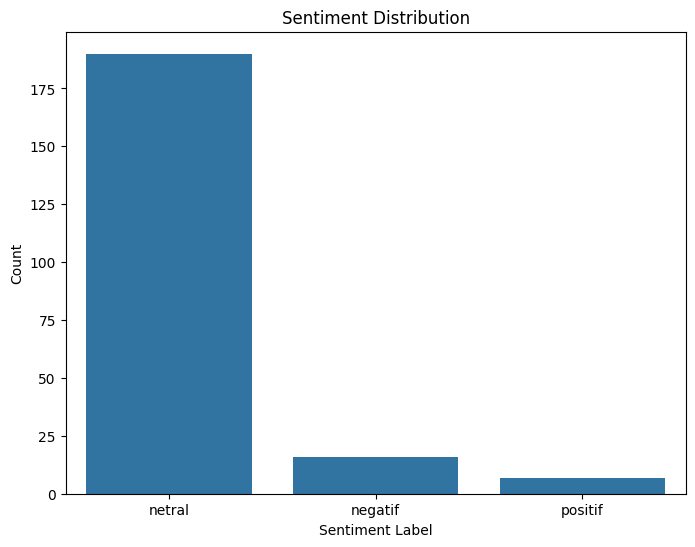

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=jokowi)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

**Buat word cloud dari setiap kategori**

dengan langkah pertama mengintal wordcloud

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

**Group data by sentiment label**

berikut group data untuk kategori negatif,netral,positif

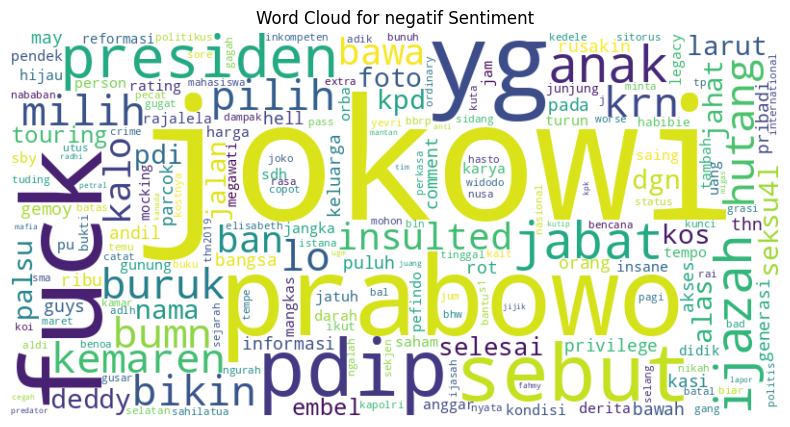

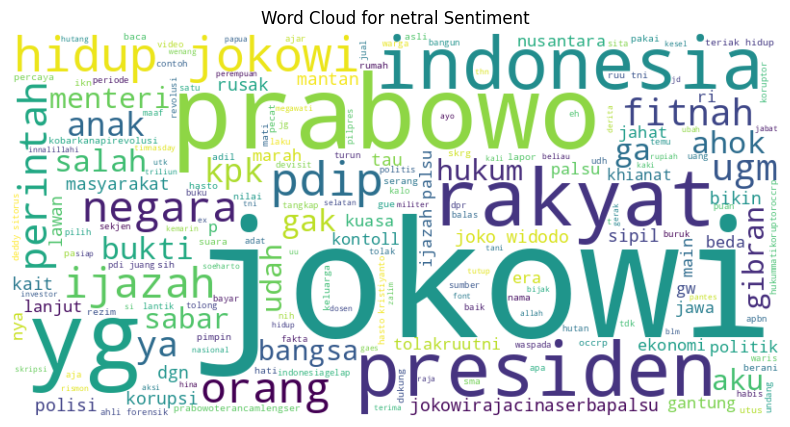

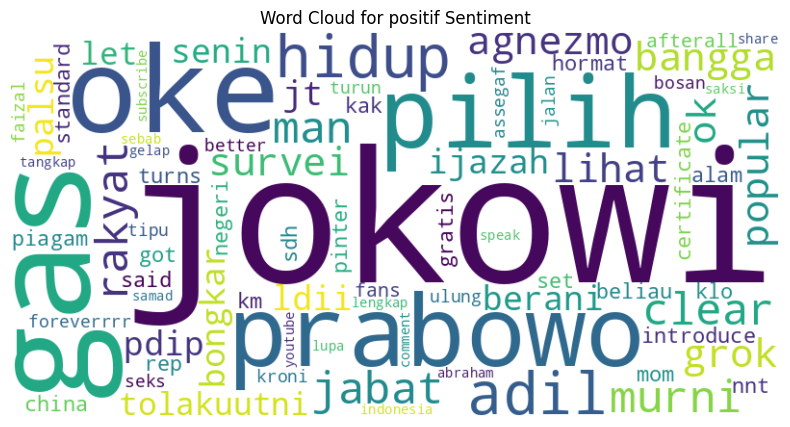

In [ ]:
sentiment_groups = jokowi.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

**1. Word Cloud Sentimen Negatif**

Pada word cloud kategori sentimen negatif, terlihat bahwa kata-kata seperti "jokowi", "prabowo", "presiden", "pdip", "hutang", "buruk", "bumn", "sebut", dan "insulted" mendominasi. Hal ini menunjukkan bahwa dalam sentimen negatif, topik-topik yang sering muncul berkaitan dengan kritik terhadap tokoh politik, kebijakan ekonomi, dan institusi pemerintahan. Kata seperti "insulted", "buruk", dan "hutang" mencerminkan ekspresi ketidakpuasan dan kekecewaan publik. Adanya nama-nama tokoh seperti Jokowi dan Prabowo menunjukkan bahwa mereka menjadi pusat perhatian dalam narasi negatif ini, kemungkinan besar dalam bentuk kritik terhadap tindakan atau kebijakan mereka.

**2. Word Cloud Sentimen Netral**

Word cloud sentimen netral menampilkan kata-kata seperti "jokowi", "prabowo", "rakyat", "presiden", "negara", "hukum", "kpk", dan "anak". Kata-kata ini bersifat informatif dan tidak mengandung emosi yang kuat. Narasi dalam sentimen netral biasanya membahas informasi, diskusi, atau pendapat yang tidak cenderung ke arah positif atau negatif. Misalnya, pembahasan tentang "kpk", "hukum", dan "negara" menunjukkan konteks peristiwa atau kebijakan yang dinyatakan secara objektif. Adanya kata "rakyat" dan "presiden" menandakan keterkaitan dengan peristiwa politik yang sedang atau telah terjadi, namun dengan nada netral.

**3. Word Cloud Sentimen Positif**

Dalam word cloud sentimen positif, kata-kata dominan meliputi "jokowi", "prabowo", "oke", "pilih", "adil", "hidup", "bangga", "gas", dan "murni". Kata-kata ini menunjukkan dukungan, semangat, dan apresiasi terhadap tokoh atau kebijakan tertentu. Misalnya, kata seperti "oke", "bangga", "adil", dan "hidup" mencerminkan optimisme, penerimaan, dan pujian dari masyarakat terhadap isu yang dibicarakan. Kata "gas" dalam konteks ini kemungkinan digunakan dalam arti slang sebagai ajakan atau dukungan (misalnya “gas terus!”), yang menunjukkan sentimen positif dan antusiasme terhadap topik yang dibahas.